## Init

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

!cp '/gdrive/MyDrive/yolo_all_images.zip' .
!unzip -q yolo_all_images.zip
!mv yolo_all_images/* .

Mounted at /gdrive


In [ ]:
%%capture
!git clone https://github.com/ultralytics/yolov5.git
%cd /content/yolov5
!pip install -r requirements.txt
!pip install wandb

In [ ]:
import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-4-g7398d2d Python-3.7.15 torch-1.12.1+cu113 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.4/225.8 GB disk)


In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-4-g7398d2d Python-3.7.15 torch-1.12.1+cu113 CPU

100% 14.1M/14.1M [00:01<00:00, 13.9MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 512.5ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 392.8ms
Speed: 3.1ms pre-process, 452.7ms inference, 8.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


## Train

In [ ]:
!python train.py \
  --data ../dataset.yaml \
  --epochs 50 \
  --project toadid_detection \
  --bbox_interval 1 \
  --rect \
  --weights yolov5s.pt 

wandb: Currently logged in as: ctcf. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=../dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=True, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=toadid_detection, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-249-gff6e6e3 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1

In [ ]:
!ls toadid_detection/exp/weights

best.pt  last.pt


In [ ]:
# !cp toadid_detection/exp/weights/best.pt /gdrive/MyDrive/toadid_detection/

In [ ]:
!cp -r toadid_detection/exp/ /gdrive/MyDrive/toadid_detection/18112022_all

### Loading

In [ ]:
!mkdir toadid_detection

In [ ]:
!cp -r /gdrive/MyDrive/toadid_detection/18112022_all/* toadid_detection/

In [ ]:
!ls /gdrive/MyDrive/toadid_detection

15092022  18112022_all	best.pt


### Export tensorflow.js model

In [ ]:
!pip install tensorflowjs -q

In [ ]:
!python export.py --weights toadid_detection/weights/best.pt --include tfjs

export: data=data/coco128.yaml, weights=['toadid_detection/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tfjs']
YOLOv5 🚀 v7.0-4-g7398d2d Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from toadid_detection/weights/best.pt with output shape (1, 25200, 6) (13.8 MB)
2022-11-24 14:06:11.374322: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 14:06:12.707131: W te

In [ ]:
!ls toadid_detection/exp/weights

In [ ]:
!zip -jr 'toadid.tfjs.zip' toadid_detection/weights/best_web_model

  adding: group1-shard6of7.bin (deflated 7%)
  adding: group1-shard4of7.bin (deflated 7%)
  adding: group1-shard5of7.bin (deflated 7%)
  adding: group1-shard1of7.bin (deflated 8%)
  adding: model.json (deflated 94%)
  adding: group1-shard2of7.bin (deflated 7%)
  adding: group1-shard3of7.bin (deflated 7%)
  adding: group1-shard7of7.bin (deflated 7%)


In [ ]:
!cp toadid.tfjs.zip /gdrive/MyDrive/toadid.tfjs.2.zip

## PyTorch inference

In [ ]:
import os
import torchvision.transforms as tt

from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
from tqdm.notebook import tqdm

In [ ]:
yolo_model = torch.hub.load('ultralytics/yolov5', 'custom', path='toadid_detection/weights/best.pt')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-4-g7398d2d Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
#state_dict = torch.load('toadid_detection/exp/weights/best.pt')
#yolo_model.load_state_dict(state_dict['model'].state_dict())

In [ ]:
!rm -r toadbox

# TOADBOX_2 dataset
!cp /gdrive/MyDrive/toadbox_2.zip .
!unzip -q toadbox_2.zip
!mv toadbox_2 toadbox

In [ ]:
yolo_model ;

In [ ]:
!ls toadbox

2_t0   2_t14  2_t2   2_t25  2_t30  2_t4  t0   t14  t2	t25  t30  t36  t6
2_t1   2_t15  2_t20  2_t26  2_t31  2_t5  t1   t15  t20	t26  t31  t37  t7
2_t10  2_t16  2_t21  2_t27  2_t32  2_t6  t10  t16  t21	t27  t32  t38  t8
2_t11  2_t17  2_t22  2_t28  2_t33  2_t7  t11  t17  t22	t28  t33  t39  t9
2_t12  2_t18  2_t23  2_t29  2_t34  2_t8  t12  t18  t23	t29  t34  t4
2_t13  2_t19  2_t24  2_t3   2_t35  2_t9  t13  t19  t24	t3   t35  t5


In [ ]:
def crop_save(ds_path, outdir='toadbox_crop'):
    for t in tqdm(os.listdir(ds_path)):
        batch_names = os.listdir(os.path.join(ds_path, t))
        crop_names = [os.path.join(outdir, t, x) for x in batch_names]
        for dir in [os.path.join(outdir, t) for x in batch_names]:
            os.makedirs(dir, exist_ok=True)
        batch_names = [os.path.join(ds_path, t, x) for x in batch_names]
        preds = yolo_model(batch_names)

        for name, crop_name, bboxes in zip(batch_names, crop_names, preds.xyxy):
            if len(bboxes) == 0:
                print(f'{name} empty!')
                continue
            best_pred = sorted(bboxes, key=lambda bbox: bbox[4], reverse=True)[0]
            bbox = best_pred[:4].tolist()
            crop = Image.open(name).crop((*bbox, ))
            crop.save(crop_name)

In [ ]:
out = yolo_model('toadbox/t20/IMG_8788.JPG').crop(save=False)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob
from PIL import Image
import cv2 as cv

In [ ]:
def crop_best(yolo_out):
    best_score = 0
    img = None
    for crop in yolo_out:
        score = crop['conf'].item()
        if score > best_score:
            best_score = score
            img = crop['im']
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img

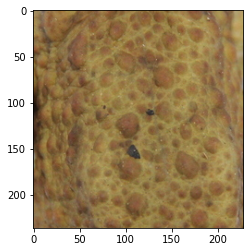

In [ ]:
plt.imshow(crop_best(out))

In [ ]:
crop_save(ds_path='toadbox', outdir='toadbox_crop')

In [ ]:
!rm toadbox_crop.zip

In [ ]:
!zip -qr toadbox_crop.zip toadid_crop/

In [ ]:
!cp toadbox_crop.zip /gdrive/MyDrive/

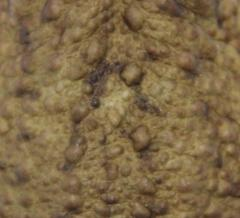

In [ ]:
display.Image(filename='crop/t25/IMG_8874.JPG', width=600)